In [ ]:
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.12.0
2.12.0


Base Code

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Colab\ Notebooks/tusimple.zip

Streaming output truncated to the last 5000 lines.
  inflating: TUSimple/train_set/seg_label/0313-2/115/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1150/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11520/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1155/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11580/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1160/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11640/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1165/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1170/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11700/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1175/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11760/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1180/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11820/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1185/20.png  

In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
%matplotlib inline

json_gt = [json.loads(line) for line in open('/content/TUSimple/train_set/label_data_0601.json')]
print(np.shape(json_gt))

image_names = []
mask_names = []

for i in range(np.shape(json_gt)[0]):
  gt = json_gt[i]
  gt_lanes = gt['lanes']
  y_samples = gt['h_samples']
  raw_file = gt['raw_file']
  address = '/content/TUSimple/train_set/'+raw_file
  image_names.append(address)
  image = plt.imread(address)
  #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

  #print(np.shape(image))
  #image = image.resize((200, 200,3))
  gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
  # Create an empty mask
  mask = np.zeros(image.shape[:2], dtype=np.uint8)
  # Draw a rectangle on the mask
  for lane in gt_lanes_vis:
      for pt in lane:
          cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

  mask = mask.astype(np.uint8)
  #print(np.shape(mask))

  tosave = Image.fromarray(mask)
  mask_add = '/content/TUSimple/Masks/'+raw_file[11:30]+'.png'
  mask_names.append(mask_add)
  tosave.save(mask_add)

json_gt = [json.loads(line) for line in open('/content/TUSimple/train_set/label_data_0313.json')]
print(np.shape(json_gt))

for i in range(np.shape(json_gt)[0]):
  gt = json_gt[i]
  gt_lanes = gt['lanes']
  y_samples = gt['h_samples']
  raw_file = gt['raw_file']
  address = '/content/TUSimple/train_set/'+raw_file
  image_names.append(address)
  image = plt.imread(address)
  #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

  #print(np.shape(image))
  #image = image.resize((200, 200,3))
  gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
  # Create an empty mask
  mask = np.zeros(image.shape[:2], dtype=np.uint8)
  # Draw a rectangle on the mask
  for lane in gt_lanes_vis:
      for pt in lane:
          cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

  mask = mask.astype(np.uint8)
  #print(np.shape(mask))

  tosave = Image.fromarray(mask)
  if len(raw_file) == 22:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:15]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 23:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:16]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 24:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:17]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 25:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:18]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 26:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:19]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)


print(np.shape(image_names))
print(np.shape(mask_names))

(410,)
(2858,)
(3268,)
(3268,)


In [ ]:
num_images = 400

image_names_subset = image_names[0:num_images]
images = [cv2.resize(cv2.imread(img), dsize=(320, 180), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]
images2 = [cv2.resize(cv2.imread(img), dsize=(256, 256), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]

#images = [cv2.imread(img) for img in image_names_subset]


image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 4)

image_dataset2 = np.array(images2)
image_dataset2 = np.expand_dims(image_dataset2, axis = 4)

mask_names_subset = mask_names[0:num_images]
masks = [cv2.resize(cv2.imread(mask, 0), dsize=(320, 180), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]
masks2 = [cv2.resize(cv2.imread(mask, 0), dsize=(256, 256), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]

#masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

mask_dataset2 = np.array(masks2)
mask_dataset2 = np.expand_dims(mask_dataset2, axis = 3)

print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (400, 180, 320, 3, 1)
Mask data shape is:  (400, 180, 320, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

#Normalize images
image_dataset2 = image_dataset2 /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset2 = mask_dataset2 /255.  #PIxel values will be 0 or 1

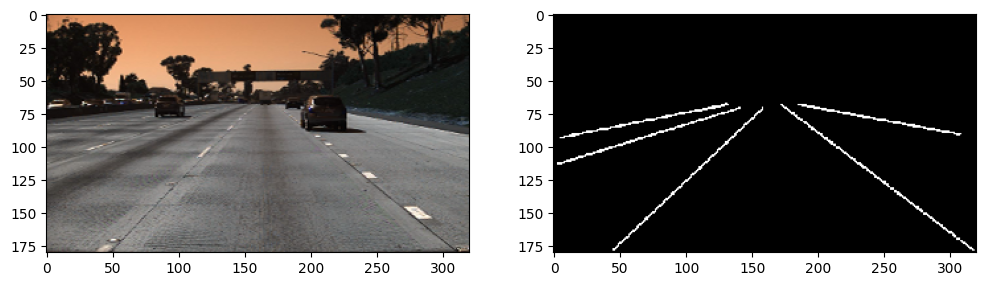

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.resize(X_train[image_number,:,:,:,0], dsize=(320, 180), interpolation=cv2.INTER_CUBIC))
plt.subplot(122)
plt.imshow(cv2.resize(y_train[image_number,:,:,0], dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.show()

In [ ]:
#Reused parameters in all models
import tensorflow
n_classes=1
activation='sigmoid'

LR = 0.0001
optim = tensorflow.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

In [ ]:
###Model
#BACKBONE = 'resnet34'
BACKBONE = 'resnext50'
preprocess_input = sm.get_preprocessing(BACKBONE)

# preprocess input
X_train_processed = preprocess_input(X_train)
X_test_processed = preprocess_input(X_test)

In [ ]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
# model.compile(optim, focal_loss, metrics=metrics)
model.compile(optim, total_loss, metrics=metrics)

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

#print(model.summary())

173622728/173622728 [==============================] - 3s 0us/step


In [ ]:
history=model.fit(X_train_processed,
          y_train,
          batch_size=32,
          epochs=60,
          verbose=1,
          validation_data=(X_test_processed, y_test))


model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/resNext101_backbone_60_epochs_1200.hdf5')

Epoch 1/60


Plot

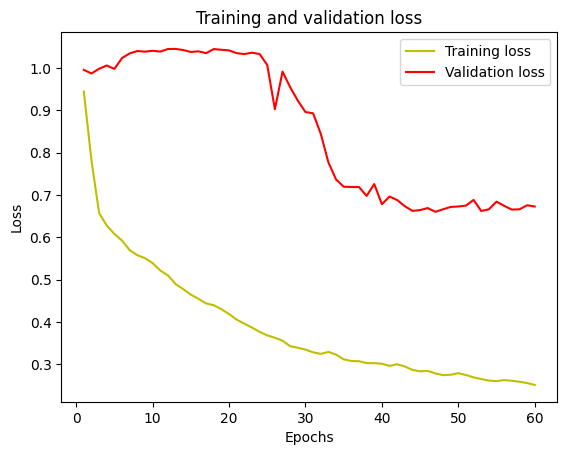

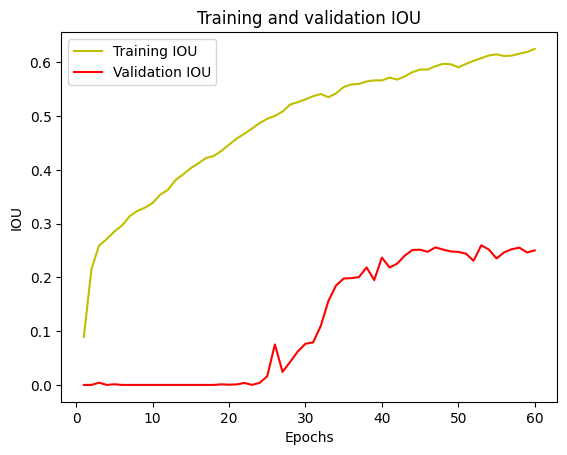

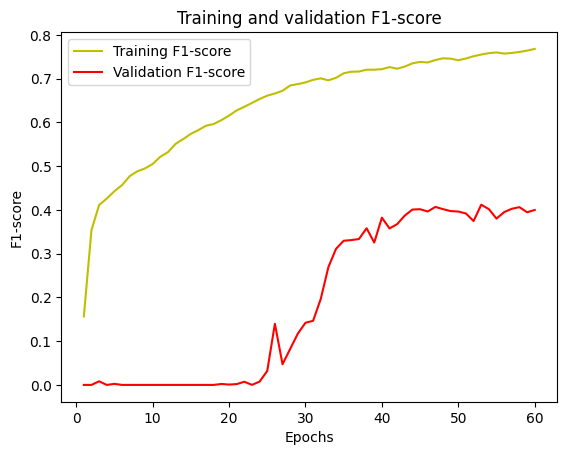

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']
plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

f1 = history.history['f1-score']
val_f1 = history.history['val_f1-score']
plt.plot(epochs, f1, 'y', label='Training F1-score')
plt.plot(epochs, val_f1, 'r', label='Validation F1-score')
plt.title('Training and validation F1-score')
plt.xlabel('Epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/saved_models/res34_backbone_60_epochs_1200.hdf5", compile=False)

In [ ]:
#Prediction
y_pred=model.predict(X_test)
print(y_pred.shape)
y_pred_thresholded = y_pred > 0.4

8/8 [==============================] - 1s 117ms/step
(240, 256, 256, 1)


In [ ]:
from tensorflow.keras.metrics import MeanIoU

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
print(y_pred_thresholded.shape)
print(y_test.shape)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

(240, 256, 256, 1)
(240, 256, 256, 1)
Mean IoU = 0.6155319


(1, 256, 256, 3, 1)
1/1 [==============================] - 0s 25ms/step


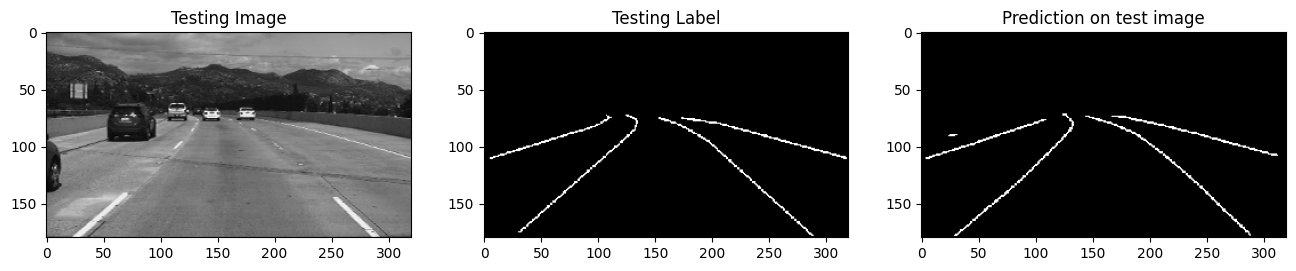

In [ ]:
threshold = 0.4
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.4).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(cv2.resize(test_img[:,:,0], dsize=(320, 180), interpolation=cv2.INTER_CUBIC))
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(cv2.resize(ground_truth[:,:,0], dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(cv2.resize(prediction, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')

plt.show()

# Compare Models

In [ ]:
#Load previously saved model
from keras.models import load_model
from tensorflow.keras.metrics import MeanIoU
import cv2
import numpy as np
import matplotlib.pyplot as plt

model1 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/400image30epochsFinal.hdf5", compile=False)
model2 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/400image30epochsBirdFinal.hdf5", compile=False)
model3 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/resnet34_backbone_60_epochs_400.hdf5", compile=False)
model4 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/res34_backbone_60_epochs_800.hdf5", compile=False)
model5 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/res34_backbone_60_epochs_1200.hdf5", compile=False)
model6 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/resNext50_backbone_60_epochs_400.hdf5", compile=False)
model7 = load_model("/content/gdrive/MyDrive/Colab Notebooks/saved_models/nex50_backbone_60_epochs_800.hdf5", compile=False)

IMAGE_H = 180
IMAGE_W = 320

src = np.float32([[50, 155], [90, 118], [235, 118], [273, 155]])
dst = np.float32([[130, 173], [130, 153], [170, 153], [170, 173]])

M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

X_test_b = np.zeros([num_images,IMAGE_H,IMAGE_W,3,1])
y_test_b = np.zeros([num_images,IMAGE_H,IMAGE_W,1])

for i in range(num_images):
  X_test_b[i,:,:,:,0] = cv2.warpPerspective(image_dataset[i,:,:,:,0], M, (IMAGE_W, IMAGE_H))
  y_test_b[i,:,:,0] = cv2.warpPerspective(mask_dataset[i,:,:,0], M, (IMAGE_W, IMAGE_H))


#Prediction
y_pred1=model1.predict(image_dataset)
y_pred_thresholded1 = y_pred1 > 0.4

y_pred2=model2.predict(X_test_b)
y_pred_thresholded2 = y_pred2 > 0.4

y_pred3=model3.predict(image_dataset2)
y_pred_thresholded3 = y_pred3 > 0.4

y_pred4=model4.predict(image_dataset2)
y_pred_thresholded4 = y_pred4 > 0.4

y_pred5=model5.predict(image_dataset2)
y_pred_thresholded5 = y_pred5 > 0.4

y_pred6=model6.predict(image_dataset2)
y_pred_thresholded6 = y_pred6 > 0.4

y_pred7=model7.predict(image_dataset2)
y_pred_thresholded7 = y_pred7 > 0.4


n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)

IOU_keras.update_state(y_pred_thresholded1, mask_dataset)
print("Model 1 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded2, y_test_b)
print("Model 2 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded3, mask_dataset2)
print("Model 3 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded4, mask_dataset2)
print("Model 4 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded5, mask_dataset2)
print("Model 5 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded6, mask_dataset2)
print("Model 6 Mean IoU =", IOU_keras.result().numpy())

IOU_keras.update_state(y_pred_thresholded7, mask_dataset2)
print("Model 7 Mean IoU =", IOU_keras.result().numpy())


13/13 [==============================] - 8s 243ms/step
Model 1 Mean IoU = 0.6941029
Model 2 Mean IoU = 0.6283853
Model 3 Mean IoU = 0.6991762
Model 4 Mean IoU = 0.73608625
Model 5 Mean IoU = 0.75671387
Model 6 Mean IoU = 0.77445537
Model 7 Mean IoU = 0.787073


# Generate Output

1/1 [==============================] - 0s 83ms/step


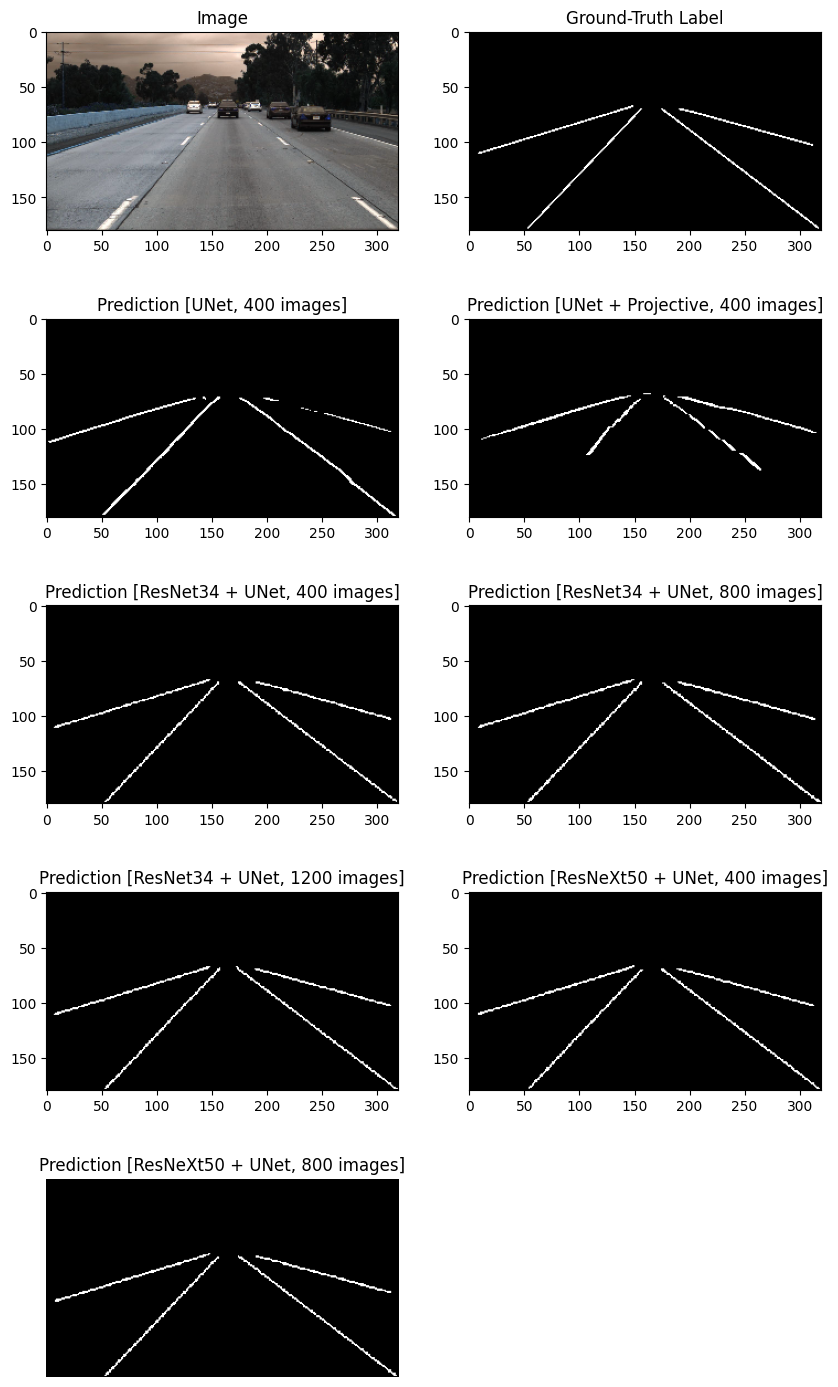

In [ ]:
import random

threshold = 0.4
test_img_number = random.randint(0, len(image_dataset)-1)
test_img = image_dataset[test_img_number]
test_img2 = image_dataset2[test_img_number]
test_img3 = X_test_b[test_img_number]

ground_truth=mask_dataset[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

ground_truth2=mask_dataset2[test_img_number]
test_img_input2=np.expand_dims(test_img2, 0)

test_img_input3=np.expand_dims(test_img3, 0)

#print(test_img_input.shape)

prediction1 = (model1.predict(test_img_input)[0,:,:,0] > 0.4).astype(np.uint8)
prediction2 = (model2.predict(test_img_input3)[0,:,:,0] > 0.4).astype(np.uint8)
myresult2 = cv2.warpPerspective(prediction2, Minv, (IMAGE_W, IMAGE_H))

prediction3 = (model3.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction4 = (model4.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction5 = (model5.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction6 = (model6.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)
prediction7 = (model7.predict(test_img_input2)[0,:,:,0] > 0.1).astype(np.uint8)

plt.figure(figsize=(10, 18))
plt.subplot(521)
plt.title('Image')
plt.imshow(cv2.resize(test_img[:,:,:,0], dsize=(320, 180), interpolation=cv2.INTER_CUBIC))
plt.subplot(522)
plt.title('Ground-Truth Label')
plt.imshow(cv2.resize(ground_truth[:,:,0], dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(523)
plt.title('Prediction [UNet, 400 images]')
plt.imshow(cv2.resize(prediction1, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(524)
plt.title('Prediction [UNet + Projective, 400 images]')
plt.imshow(cv2.resize(myresult2, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(525)
plt.title('Prediction [ResNet34 + UNet, 400 images]')
plt.imshow(cv2.resize(prediction3, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(526)
plt.title('Prediction [ResNet34 + UNet, 800 images]')
plt.imshow(cv2.resize(prediction4, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(527)
plt.title('Prediction [ResNet34 + UNet, 1200 images]')
plt.imshow(cv2.resize(prediction5, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(528)
plt.title('Prediction [ResNeXt50 + UNet, 400 images]')
plt.imshow(cv2.resize(prediction6, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')
plt.subplot(529)
plt.title('Prediction [ResNeXt50 + UNet, 800 images]')
plt.imshow(cv2.resize(prediction7, dsize=(320, 180), interpolation=cv2.INTER_NEAREST), cmap='gray')

plt.axis('off')

plt.show()